In [42]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft

In [12]:
import mogptk

In [37]:

def low_fidelity(x):
    if np.abs(x) <= 1:
        return 1
    else:
        return 0


def high_fidelity(x):
    if x < -2 or x > 2:
        return 0
    if x > -2 and x < 0:
        return 2 + x
    if x > 0 and x < 2:
        return 2 - x

In [64]:
def generate_points(start,stop,num_points,subsequence):
    eps = 0.8
    len = stop-start

    step = eps * (1 / len)
    points_x = []

    for i in range(num_points):
            start = np.random.uniform(start, stop, 1)
            x=np.linspace(start, subsequence * step + start, subsequence)
            for i in x:
                points_x.append(i[0])
    return np.asarray(points_x)


x=np.linspace(-3,3,5000)
points1=[low_fidelity(i)  for i in x ]
points2=[high_fidelity(i) for i in x]

f2=[]
f1=[]
i=0
while i< (len(points1)):
    f2.append(points2[i:i+10])
    f1.append(points1[i:i+10])
    i+=10


In [44]:
x[:10]

array([-2.17796287, -2.02981472, -1.88166657, -1.73351842, -1.58537027,
       -1.43722212, -1.28907398, -1.14092583, -0.99277768, -0.84462953])

[] imag


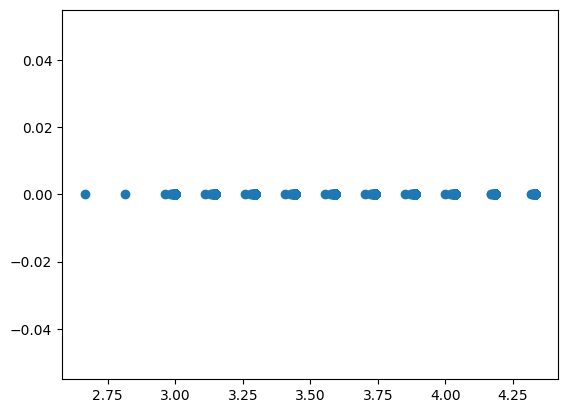

In [39]:
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
conv_points=np.asarray(points2)
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+10])
    f1.append(points1[i:i+10])
    i+=10
    
f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(500):
    value1 = rfft(f1[i])
    value2=rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)


x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

m1_real = mogptk.LoadModel("m1_r_triangle")
m2_real = mogptk.LoadModel('m2_r_triangle')
m3_real = mogptk.LoadModel('m3_r_triangle')
m4_real = mogptk.LoadModel('m4_r_triangle')
m5_real = mogptk.LoadModel('m5_r_triangle')
m6_real = mogptk.LoadModel('m6_r_triangle')

m1_im = mogptk.LoadModel("m1_i_triangle")
m2_im = mogptk.LoadModel('m2_i_triangle')
m3_im = mogptk.LoadModel('m3_i_triangle')
m4_im = mogptk.LoadModel('m4_i_triangle')
m5_im = mogptk.LoadModel('m5_i_triangle')
m6_im = mogptk.LoadModel('m6_i_triangle')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)

_,im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
_, im6, _, _ = m6_im.predict(x_train_real)

first=[]
second=[]
third=[]
fourth=[]
fifth=[]
sixth=[]

for r, im1 in zip(real,im):
    first.append(r+1j*im1)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
    
for r, im in zip(real5,im5):
    fifth.append(r+1j*im)  
    
for r, im in zip(real6,im6):
    sixth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1).flatten()

plt.scatter(x, values)
#experiment with 500 sequences

[] imag


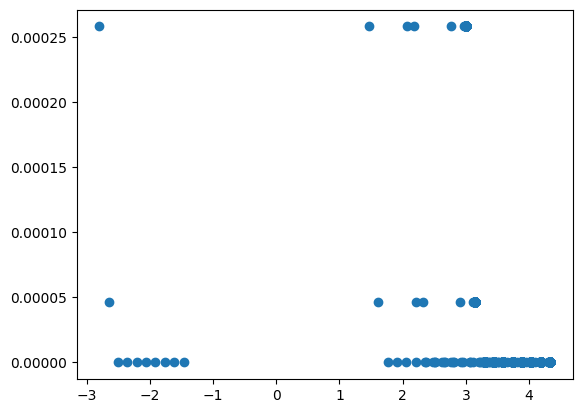

In [19]:
points1=[low_fidelity(i) for i in x ]
points2=[high_fidelity(i) for i in x]
conv_points=np.asarray(points2)
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+10])
    f1.append(points1[i:i+10])
    i+=10
    
f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(500):
    value1 = rfft(f1[i])
    value2=rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)


x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

m1_real = mogptk.LoadModel("m1_r_triangle")
m2_real = mogptk.LoadModel('m2_r_triangle')
m3_real = mogptk.LoadModel('m3_r_triangle')
m4_real = mogptk.LoadModel('m4_r_triangle')
m5_real = mogptk.LoadModel('m5_r_triangle')
m6_real = mogptk.LoadModel('m6_r_triangle')

m1_im = mogptk.LoadModel("m1_i_triangle")
m2_im = mogptk.LoadModel('m2_i_triangle')
m3_im = mogptk.LoadModel('m3_i_triangle')
m4_im = mogptk.LoadModel('m4_i_triangle')
m5_im = mogptk.LoadModel('m5_i_triangle')
m6_im = mogptk.LoadModel('m6_i_triangle')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)

_,im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
_, im6, _, _ = m6_im.predict(x_train_real)

first=[]
second=[]
third=[]
fourth=[]
fifth=[]
sixth=[]

for r, im1 in zip(real,im):
    first.append(r+1j*im1)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
    
for r, im in zip(real5,im5):
    fifth.append(r+1j*im)  
    
for r, im in zip(real6,im6):
    sixth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1).flatten()

plt.scatter(x, values)
#700 samples

[] imag


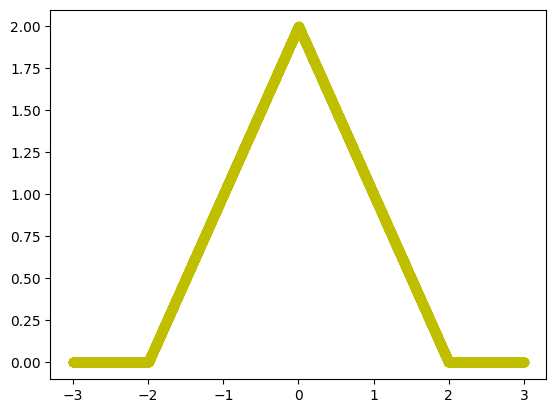

In [67]:

    
f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(500):
    value1 = rfft(f1[i])
    value2=rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)


x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

m1_real = mogptk.LoadModel("m1_r_triangle")
m2_real = mogptk.LoadModel('m2_r_triangle')
m3_real = mogptk.LoadModel('m3_r_triangle')
m4_real = mogptk.LoadModel('m4_r_triangle')
m5_real = mogptk.LoadModel('m5_r_triangle')
m6_real = mogptk.LoadModel('m6_r_triangle')

m1_im = mogptk.LoadModel("m1_i_triangle")
m2_im = mogptk.LoadModel('m2_i_triangle')
m3_im = mogptk.LoadModel('m3_i_triangle')
m4_im = mogptk.LoadModel('m4_i_triangle')
m5_im = mogptk.LoadModel('m5_i_triangle')
m6_im = mogptk.LoadModel('m6_i_triangle')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)

_,im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
_, im6, _, _ = m6_im.predict(x_train_real)

first=[]
second=[]
third=[]
fourth=[]
fifth=[]
sixth=[]

for r, im1 in zip(real,im):
    first.append(r+1j*im1)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
    
for r, im in zip(real5,im5):
    fifth.append(r+1j*im)  
    
for r, im in zip(real6,im6):
    sixth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1).flatten()

#plt.scatter(x, values)
plt.scatter(x, points2, c="y")

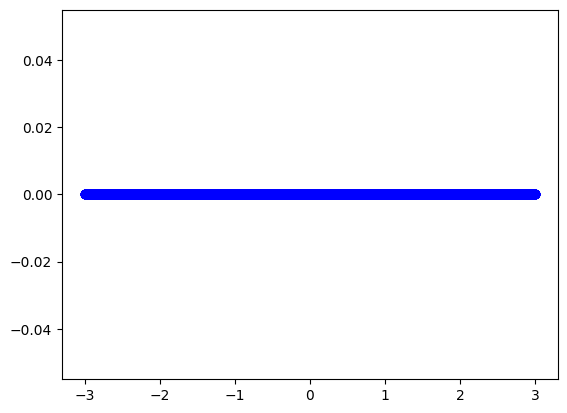

In [68]:
plt.scatter(x, values,c="b")

In [31]:
len(x)

7000

In [60]:
uniformpoints=np.random.uniform(-3,3,500)
x=np.linspace(-3,3,500)
#plt.scatter(x, uniformpoints)
values=[]
for i in uniformpoints:
    values.append(high_fidelity(i))

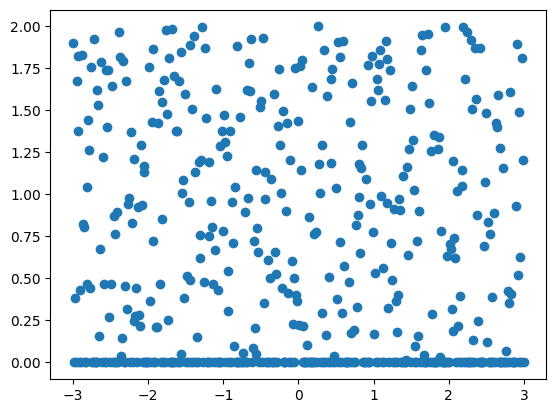

In [61]:
plt.scatter(x,values)

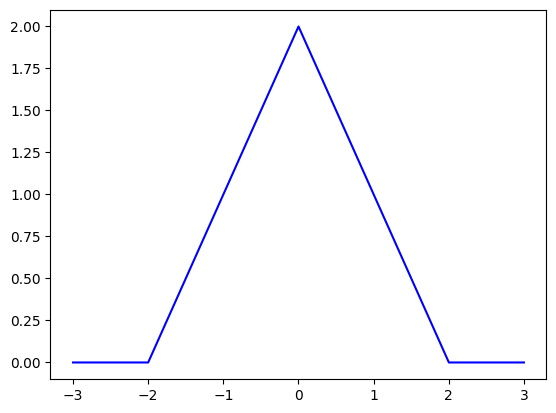

In [62]:
x=np.linspace(-3,3,5000)
points1=[high_fidelity(i) for  i in x]
plt.plot(x,points1,c="b")

[] imag


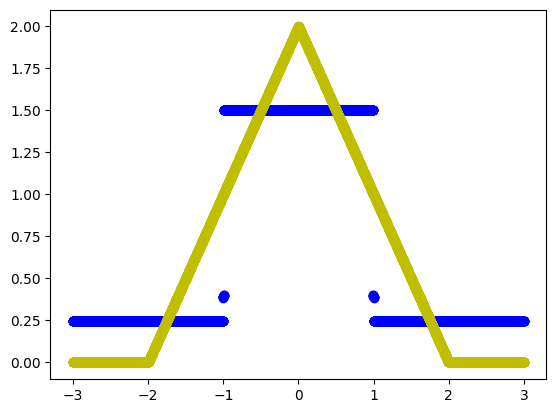

In [70]:

x=np.linspace(-3,3,7000)
points1=[low_fidelity(i)  for i in x ]
points2=[high_fidelity(i) for i in x]

f2=[]
f1=[]
i=0
while i< (len(points1)):
    f2.append(points2[i:i+10])
    f1.append(points1[i:i+10])
    i+=10

f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(700):
    value1 = rfft(f1[i])
    value2=rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)


x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

m1_real = mogptk.LoadModel("m1_r_triangle")
m2_real = mogptk.LoadModel('m2_r_triangle')
m3_real = mogptk.LoadModel('m3_r_triangle')
m4_real = mogptk.LoadModel('m4_r_triangle')
m5_real = mogptk.LoadModel('m5_r_triangle')
m6_real = mogptk.LoadModel('m6_r_triangle')

m1_im = mogptk.LoadModel("m1_i_triangle")
m2_im = mogptk.LoadModel('m2_i_triangle')
m3_im = mogptk.LoadModel('m3_i_triangle')
m4_im = mogptk.LoadModel('m4_i_triangle')
m5_im = mogptk.LoadModel('m5_i_triangle')
m6_im = mogptk.LoadModel('m6_i_triangle')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)

_,im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
_, im6, _, _ = m6_im.predict(x_train_real)

first=[]
second=[]
third=[]
fourth=[]
fifth=[]
sixth=[]

for r, im1 in zip(real,im):
    first.append(r+1j*im1)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
    
for r, im in zip(real5,im5):
    fifth.append(r+1j*im)  
    
for r, im in zip(real6,im6):
    sixth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1).flatten()

plt.scatter(x, values, c="b")
plt.scatter(x, points2, c="y")
#500 points

[] imag


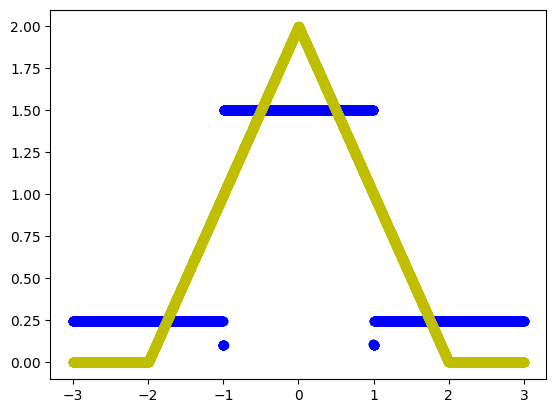

In [98]:
x=np.linspace(-3,3,5000)
points1=[low_fidelity(i)  for i in x ]
points2=[high_fidelity(i) for i in x]

f2=[]
f1=[]
i=0
while i< (len(points1)):
    f2.append(points2[i:i+10])
    f1.append(points1[i:i+10])
    i+=10

f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(500):
    value1 = rfft(f1[i])
    value2=rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)


x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

m1_real = mogptk.LoadModel("m1_r_triangle")
m2_real = mogptk.LoadModel('m2_r_triangle')
m3_real = mogptk.LoadModel('m3_r_triangle')
m4_real = mogptk.LoadModel('m4_r_triangle')
m5_real = mogptk.LoadModel('m5_r_triangle')
m6_real = mogptk.LoadModel('m6_r_triangle')

m1_im = mogptk.LoadModel("m1_i_triangle")
m2_im = mogptk.LoadModel('m2_i_triangle')
m3_im = mogptk.LoadModel('m3_i_triangle')
m4_im = mogptk.LoadModel('m4_i_triangle')
m5_im = mogptk.LoadModel('m5_i_triangle')
m6_im = mogptk.LoadModel('m6_i_triangle')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)

_,im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
_, im6, _, _ = m6_im.predict(x_train_real)

first=[]
second=[]
third=[]
fourth=[]
fifth=[]
sixth=[]

for r, im1 in zip(real,im):
    first.append(r+1j*im1)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
    
for r, im in zip(real5,im5):
    fifth.append(r+1j*im)  
    
for r, im in zip(real6,im6):
    sixth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1).flatten()

plt.scatter(x, values, c="b")
plt.scatter(x, points2, c="y")
#500 points

In [75]:
def test_func(x):
    return np.sin(np.pi*x)
def test_funct(x):
    return np.sin(2*np.pi*x)

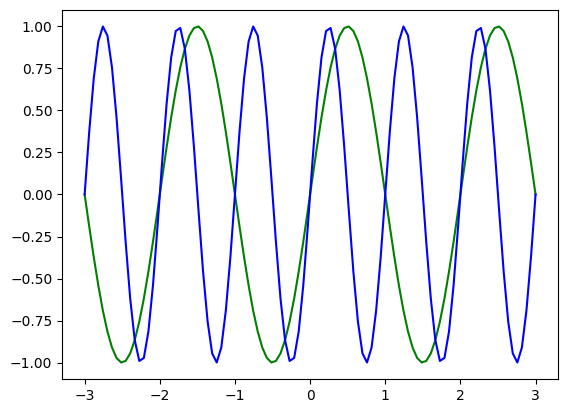

In [76]:
x=np.linspace(-3,3,100)
points1=[test_func(i) for i in x]
points2=[test_funct(i) for i in x]
plt.plot(x, points1, c="g")
plt.plot(x, points2, c="b")

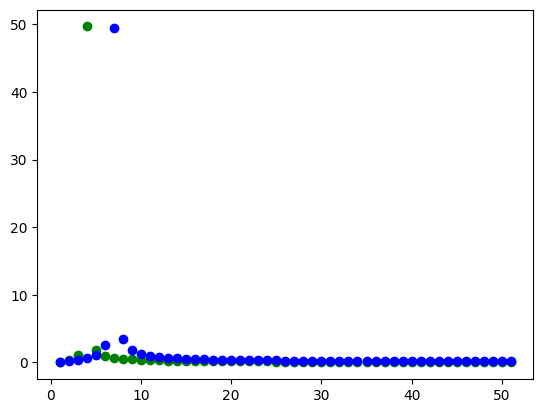

In [77]:
freq1=rfft(points1)
freq2=rfft(points2)
frequencies=np.linspace(1,51,51)
plt.scatter(frequencies, np.abs(freq1), c="g")
plt.scatter(frequencies, np.abs(freq2), c="b")

In [86]:
np.abs(freq2[6])

49.44265912863137

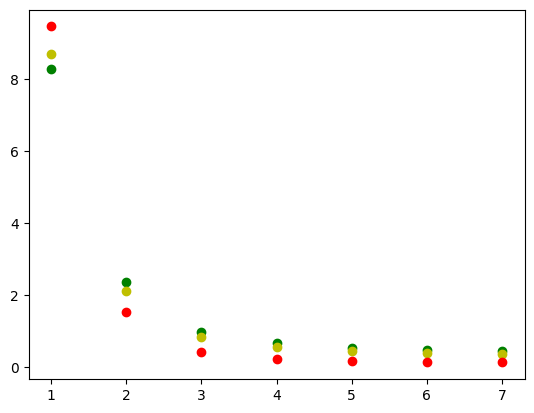

In [87]:
freq3=rfft(points1[:12])
freq4=rfft(points1[50:62])
freq5=rfft(points1[20:32])
pp=np.linspace(1,7,7)
plt.scatter(pp,np.abs(freq3), c="g")
plt.scatter(pp, np.abs(freq4), c="y")
plt.scatter(pp, np.abs(freq5), c="r")

In [137]:
list_samples=[]
sequence=[]
for i in range(3):
    point=np.random.uniform(-9,9,1)
    step=0.06
    for k in range(100):
        sequence.append(point+k*step)
    list_samples.append(sequence)
    sequence=[]
    
print(list_samples)
values=[]    
for lis in list_samples:
    points=[]
    for p in range(100):
        points.append(test_func(lis[p])[0])
    values.append(points)


[[array([-7.41520101]), array([-7.35520101]), array([-7.29520101]), array([-7.23520101]), array([-7.17520101]), array([-7.11520101]), array([-7.05520101]), array([-6.99520101]), array([-6.93520101]), array([-6.87520101]), array([-6.81520101]), array([-6.75520101]), array([-6.69520101]), array([-6.63520101]), array([-6.57520101]), array([-6.51520101]), array([-6.45520101]), array([-6.39520101]), array([-6.33520101]), array([-6.27520101]), array([-6.21520101]), array([-6.15520101]), array([-6.09520101]), array([-6.03520101]), array([-5.97520101]), array([-5.91520101]), array([-5.85520101]), array([-5.79520101]), array([-5.73520101]), array([-5.67520101]), array([-5.61520101]), array([-5.55520101]), array([-5.49520101]), array([-5.43520101]), array([-5.37520101]), array([-5.31520101]), array([-5.25520101]), array([-5.19520101]), array([-5.13520101]), array([-5.07520101]), array([-5.01520101]), array([-4.95520101]), array([-4.89520101]), array([-4.83520101]), array([-4.77520101]), array([-

In [128]:
values=np.asarray(values)
values.shape

(3, 100)

In [129]:
rfft(values[0])

array([-8.32667268e-15+0.00000000e+00j, -1.11506426e-14+1.00264523e-15j,
       -4.38276274e-15+6.50847416e-15j,  4.14868994e+01-2.79076545e+01j,
        7.56306464e-15-3.91059464e-16j,  6.06577663e-15-5.49710556e-15j,
       -3.58457521e-15+2.58259194e-15j,  7.88898087e-16-2.90451530e-15j,
       -7.24006946e-15+3.63853239e-15j,  2.60532637e-15-9.51358582e-15j,
       -1.42315205e-14-4.25996863e-15j, -3.04492559e-16+5.22860015e-15j,
        5.35420474e-15-4.95333924e-15j, -5.14809847e-15+5.41315502e-16j,
        1.70623872e-15-7.65230735e-15j,  3.36942938e-15+4.13459481e-15j,
        1.16858597e-14-9.38694299e-15j, -6.66260560e-15-6.10186646e-15j,
       -7.07049973e-15+8.83892683e-15j,  6.90507562e-15-8.53140771e-15j,
        8.70905408e-17+3.61156315e-15j,  4.30335076e-15-2.51674294e-15j,
        8.88178420e-16+6.21724894e-15j, -8.10129695e-16+2.06617021e-15j,
        6.58627008e-15-3.46064838e-15j, -1.16573418e-14-1.24344979e-14j,
       -5.46684443e-15+1.57070567e-14j,  2.38709304

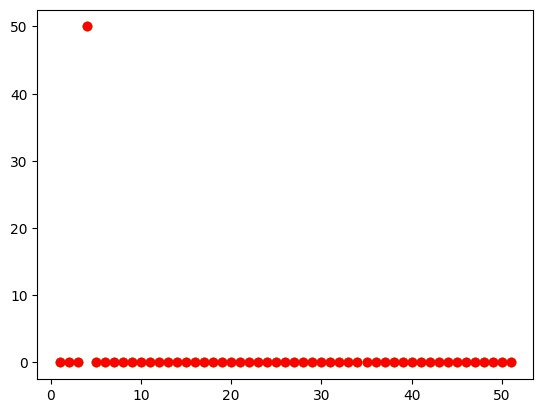

In [138]:
freq3=rfft(values[0])
freq4=rfft(values[1])
freq5=rfft(values[2])
pp=np.linspace(1,51,51)
plt.scatter(pp,np.abs(freq3), c="g")
plt.scatter(pp, np.abs(freq4), c="y")
plt.scatter(pp, np.abs(freq5), c="r")
#local sampling

[] imag


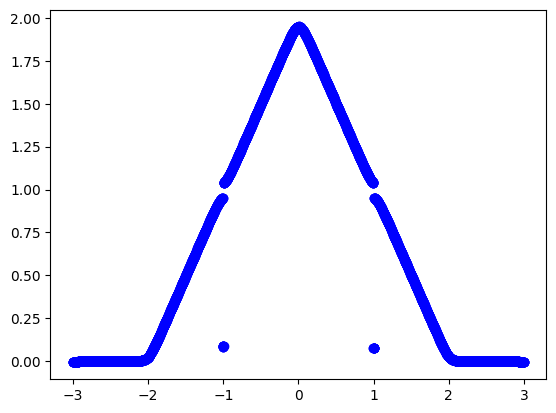

In [144]:
#local
500
points
x = np.linspace(-3, 3, 5000)
points1 = [low_fidelity(i) for i in x]
points2 = [high_fidelity(i) for i in x]

f2 = []
f1 = []
i = 0
ppp=[]
while i < (len(points1)):
    f2.append(points2[i:i + 10])
    f1.append(points1[i:i + 10])
    ppp.append(x[i:i+10])
    i += 10

f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(500):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for k in value1:
        real_train.append(k.real)
        real_train.append(k.imag)
    real_train.append(ppp[i][0])
    f1_real.append(real_train)

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10], "imag")

m1_real = mogptk.LoadModel("m1_r_triangle")
m2_real = mogptk.LoadModel('m2_r_triangle')
m3_real = mogptk.LoadModel('m3_r_triangle')
m4_real = mogptk.LoadModel('m4_r_triangle')
m5_real = mogptk.LoadModel('m5_r_triangle')
m6_real = mogptk.LoadModel('m6_r_triangle')

m1_im = mogptk.LoadModel("m1_i_triangle")
m2_im = mogptk.LoadModel('m2_i_triangle')
m3_im = mogptk.LoadModel('m3_i_triangle')
m4_im = mogptk.LoadModel('m4_i_triangle')
m5_im = mogptk.LoadModel('m5_i_triangle')
m6_im = mogptk.LoadModel('m6_i_triangle')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)

_, im, _, _ = m1_im.predict(x_train_real)
_, im2, _, _ = m2_im.predict(x_train_real)
_, im3, _, _ = m3_im.predict(x_train_real)
_, im4, _, _ = m4_im.predict(x_train_real)
_, im5, _, _ = m5_im.predict(x_train_real)
_, im6, _, _ = m6_im.predict(x_train_real)

first = []
second = []
third = []
fourth = []
fifth = []
sixth = []

for r, im1 in zip(real, im):
    first.append(r + 1j * im1)
for r, im in zip(real2, im2):
    second.append(r + 1j * im)
for r, im in zip(real3, im3):
    third.append(r + 1j * im)
for r, im in zip(real4, im4):
    fourth.append(r + 1j * im)

for r, im in zip(real5, im5):
    fifth.append(r + 1j * im)

for r, im in zip(real6, im6):
    sixth.append(r + 1j * im)
result = []
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result = np.asarray(result)

values = irfft(result, axis=1).flatten()

plt.scatter(x, values, c="b")
#plt.scatter(x, points2, c="y")
# with  added correction